In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Phishing Websites Engineered.csv')

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)

In [6]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [7]:
y_pred = knn.predict(X_test_scaled)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9316239316239316

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       620
           1       0.93      0.93      0.93       550

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170



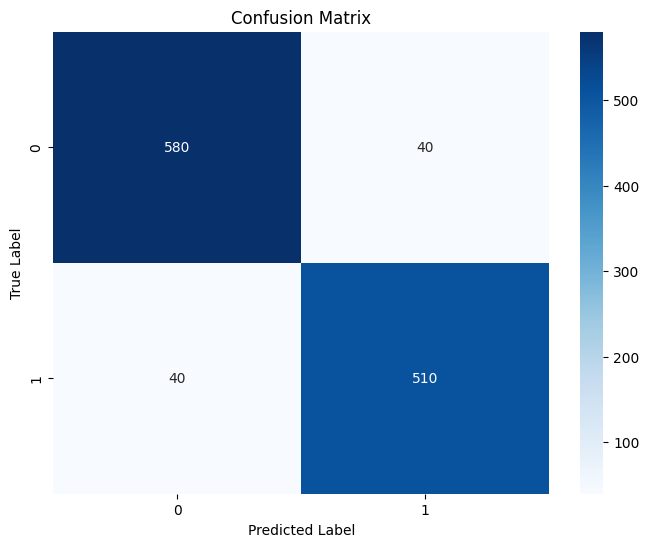

In [9]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# **SHAP**

  0%|          | 0/10 [00:00<?, ?it/s]

SHAP Summary Plot - KNN


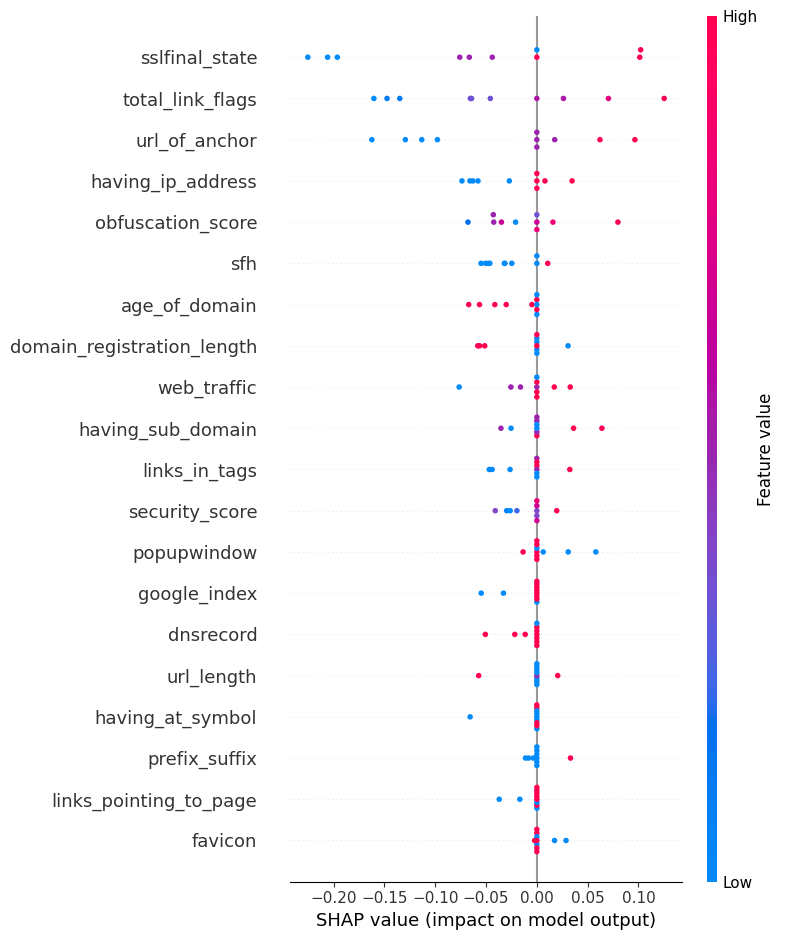

In [19]:
import shap

background = shap.sample(X_train, 100, random_state=42)
nb_explainer = shap.KernelExplainer(knn.predict_proba, background)

sample = X_test.sample(10, random_state=42)
nb_shap_values = nb_explainer.shap_values(sample)

if isinstance(nb_shap_values, list):
    nb_shap_values = nb_shap_values[1]
elif len(nb_shap_values.shape) == 3:
    nb_shap_values = nb_shap_values[:, :, 1]

print("SHAP Summary Plot - KNN")
shap.summary_plot(nb_shap_values, sample, feature_names=X_train.columns, show=False)
plt.tight_layout()
plt.show()

# **LIME**

In [14]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a9d037652298324177b3982dcbd5c68caaa9c4fa60834913c25e3c2dc3fb641e
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [15]:
import lime
import lime.lime_tabular
import numpy as np

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns.tolist(),
    class_names=['Legitimate', 'Phishing'],
    mode='classification'
)


🔍 LIME Explanations - KNN

LIME Explanation for instance 4671:


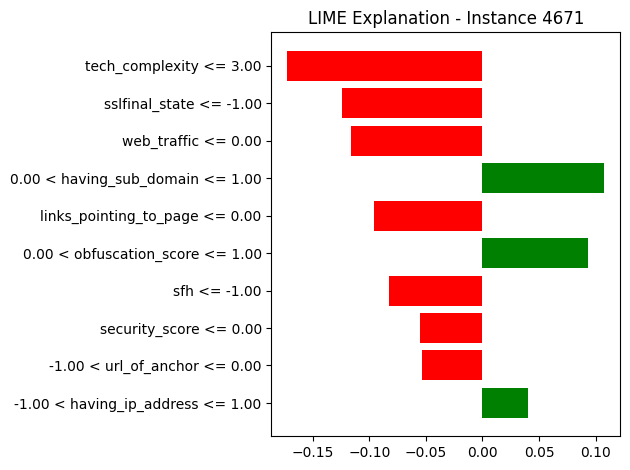


LIME Explanation for instance 1871:


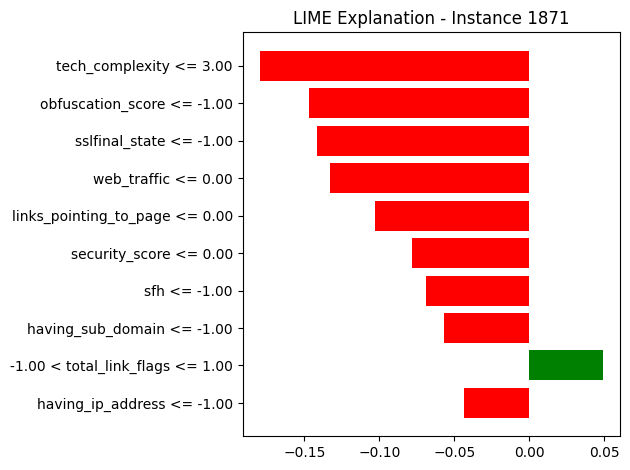


LIME Explanation for instance 1926:


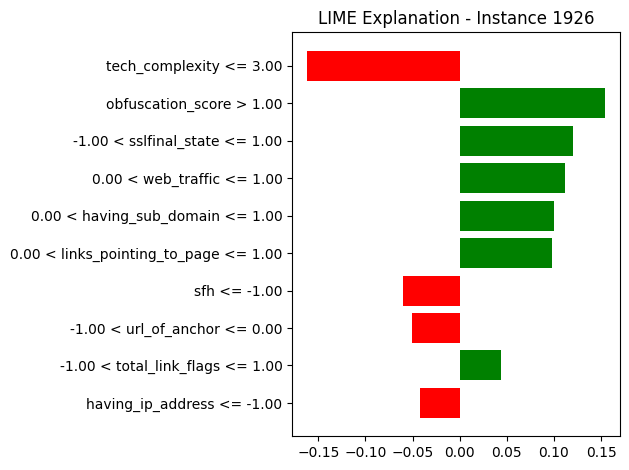

In [21]:
print("\n🔍 LIME Explanations - KNN")
for i, idx in enumerate(sample.index[:3]):
    instance = sample.loc[idx].values if isinstance(sample, pd.DataFrame) else sample.iloc[i]
    exp = lime_explainer.explain_instance(
        data_row=instance,
        predict_fn=knn.predict_proba,
        num_features=10
    )
    print(f"\nLIME Explanation for instance {idx}:")
    exp.show_in_notebook()
    fig = exp.as_pyplot_figure()
    plt.title(f"LIME Explanation - Instance {idx}")
    plt.tight_layout()
    plt.show()

In [18]:
explain_instance_lime(knn, "KNN")

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.


🔍 LIME Explanation for model: KNN on instance 753


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:427: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

# **Permutation Feature Importance**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning

Top 5 Features by PFI:
              Feature  Importance
7      sslfinal_state    0.069316
13      url_of_anchor    0.040513
30   total_link_flags    0.030684
25        web_traffic    0.017009
32  obfuscation_score    0.014530


<Figure size 1000x600 with 0 Axes>

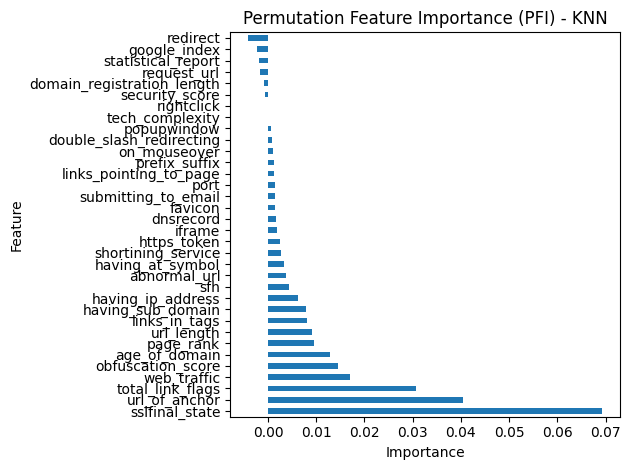

In [20]:
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

pfi_result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

pfi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': pfi_result.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Top 5 Features by PFI:")
print(pfi_df.head())

plt.figure(figsize=(10, 6))
pfi_df.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Permutation Feature Importance (PFI) - KNN")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# **PDP & ICE**

Feature sslfinal_state has 3 unique values: [ 0 -1  1]
Feature url_of_anchor has 3 unique values: [-1  0  1]
Feature total_link_flags has 9 unique values: [ 1 -1  2 -2  0  3 -3  4 -4]
Feature web_traffic has 3 unique values: [ 0 -1  1]
Feature obfuscation_score has 11 unique values: [ 0 -1  3  1  2 -3 -2  5  4 -4 -5]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning

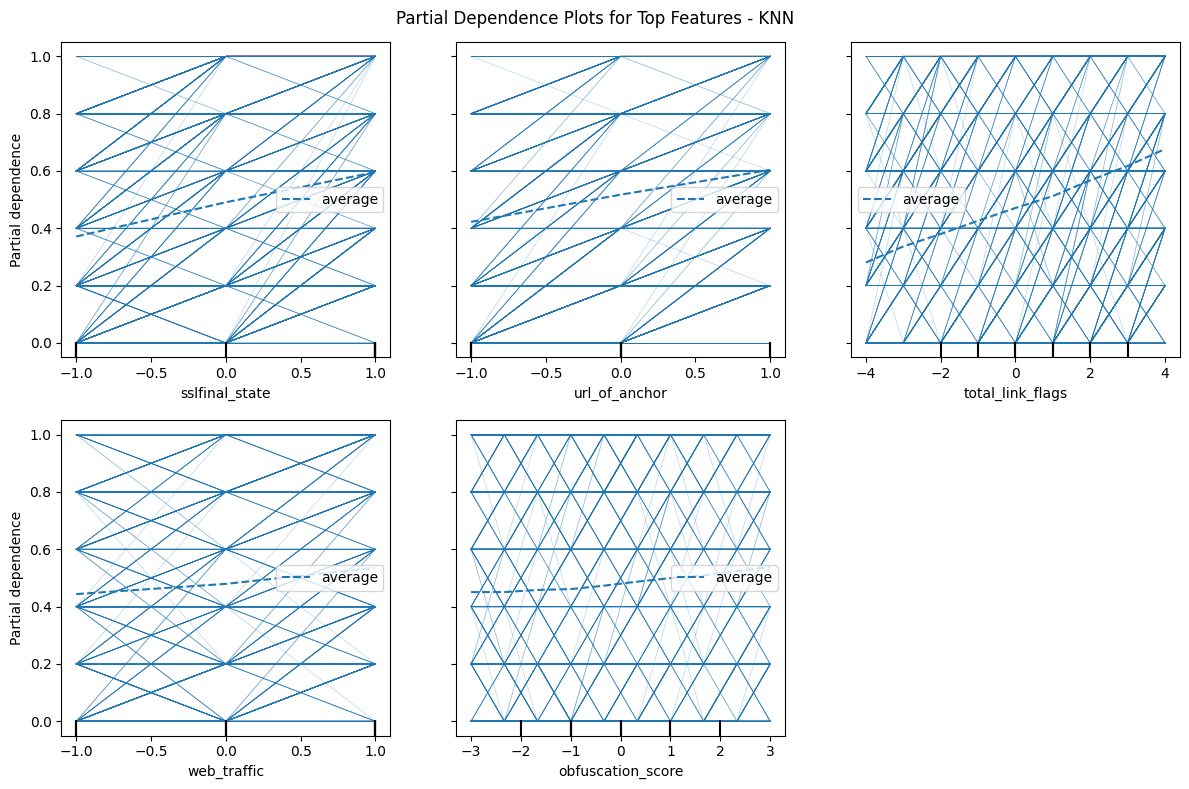

In [22]:
top_features = pfi_df['Feature'].head(5).tolist()

suitable_features = []
for feature in top_features:
    unique_values = X_test[feature].nunique()
    print(f"Feature {feature} has {unique_values} unique values: {X_test[feature].unique()}")
    if unique_values > 2:
        suitable_features.append(feature)

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    knn,
    X_test,
    features=suitable_features,
    grid_resolution=10,
    kind ="both",
    ax=ax
)
plt.suptitle("Partial Dependence Plots for Top Features - KNN")
plt.tight_layout()
plt.show()

# **LOFO Importance**

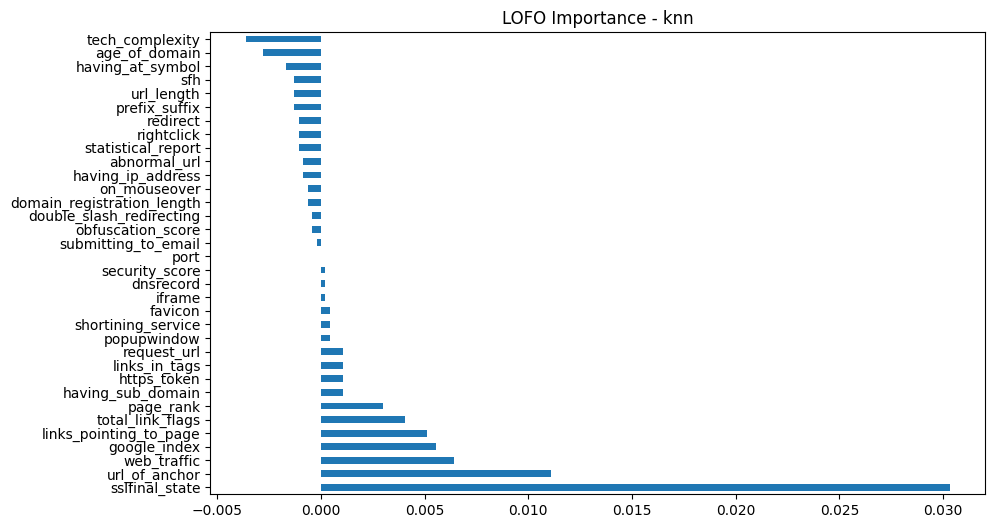

In [23]:
from sklearn.model_selection import cross_val_score
baseline= cross_val_score(knn, X_train, y_train, cv=5).mean()

lofo_scores = {}
for col in X_train.columns:
    X_lofo = X_train.drop(col, axis=1)
    lofo_score = cross_val_score(knn, X_lofo, y_train, cv=5).mean()
    lofo_scores[col] = baseline - lofo_score

lofo_df = pd.Series(lofo_scores).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
lofo_df.plot(kind='barh')
plt.title("LOFO Importance - knn")
plt.show()

In [24]:
print("\nTop 5 Features by LOFO Importance:")
print(lofo_df.head())


Top 5 Features by LOFO Importance:
sslfinal_state            0.030348
url_of_anchor             0.011113
web_traffic               0.006408
google_index              0.005556
links_pointing_to_page    0.005129
dtype: float64
